# Basic BoW model 

In [1]:
from collections import defaultdict
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from data import get_data
%pylab inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
def cleanup(x):
    # removes punctuation
    x = re.sub(r'[.,"!#/]+', ' ', x, flags=re.MULTILINE)
    # removs \\n
    x = re.sub(r'\\n', ' ', x, flags=re.MULTILINE)
    # removes retweets (e.g. @FER)
    x = re.sub(r'@\w+', '', x, flags=re.MULTILINE)

    return x

In [3]:
def vectorize_X(tweet, vocab):
    # obsolete 
    # tweet = re.sub(r'[.,"!#]+', ' ', tweet, flags=re.MULTILINE)
    #tweet = re.sub(r'@\w+', ' ', tweet, flags=re.MULTILINE)

    # splits tags into 2, e.g. #happy -> #, happy
    # TODO: tags could be useful for classification
    tweet_toks = word_tokenize(tweet)
    X_ = []
    for w in vocab:
        X_.append(1 if w in tweet_toks else 0)

    return X_

In [4]:
def create_vocab(tweets):
    vocab = set()
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    #stemmer = SnowballStemmer()
    
    clean_tweets = [cleanup(t) for t in tweets]
    
    for t in clean_tweets:
        for w in word_tokenize(t):
            vocab.add(w.strip())
    
    vocab -= set(stop_words)
        
    return sorted(vocab)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import accuracy_score

In [6]:
X_train, y_train = get_data('data/en/EI-oc-En-anger-train.txt')
X_test, y_test = get_data('data/en/2018-EI-oc-En-anger-dev.txt')

X_train_clean = [cleanup(x) for x in X_train]
X_test_clean = [cleanup(x) for x in X_test]

#vocab = create_vocab(X)

#vectorizer = CountVectorizer(ngram_range=(1, 4), stop_words='english')#, vocabulary=vocab)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=500)
#reducer = TruncatedSVD(n_components=300, random_state=42)
normalizer = Normalizer()
clf = OneVsRestClassifier(LinearSVC(random_state=42))

estimators = [('vectorize', vectorizer), ('normalize', normalizer), ('clf', clf)]

#print(X_train_clean[0])
#vectorizer.fit(X_train_clean)
#print(vectorizer.transform([X_train_clean[0]]))

## OC

In [59]:
X_train, y_train = get_data('data/en/EI-oc-En-anger-train.txt')
X_test, y_test = get_data('data/en/2018-EI-oc-En-anger-dev.txt')

X_train_clean = np.array([cleanup(x) for x in X_train])
X_test_clean = np.array([cleanup(x) for x in X_test])

#vocab = create_vocab(X)
#vectorizer = CountVectorizer(ngram_range=(1, 4), stop_words='english')#, vocabulary=vocab)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=50000)
#reducer = TruncatedSVD(n_components=300, random_state=42)
normalizer = Normalizer()
#clf = OneVsRestClassifier(LinearSVC(random_state=42))
clf = LinearSVC(random_state=42)

estimators = [('vectorize', vectorizer), ('normalize', normalizer), ('clf', clf)]


#print(X_train_clean[0])
vectorizer.fit(X_train_clean)
X_train_clean[3]
#print(X_train_clean.shape)

" passed away early this morning in a fast and furious styled car crash as he was leaving an ATL strip club  That's rough stuff"

In [57]:
pipe = Pipeline(memory=None, steps=estimators).fit(X_train_clean, y_train)

print(accuracy_score(y_test, pipe.predict(X_test_clean)))
uniq = np.unique(y_test)
y_rand = np.random.randint(uniq[0], uniq[-1], y_test.shape[0])
print(accuracy_score(y_test, y_rand))

0.38402061855670105
0.26288659793814434


In [60]:
from sklearn.preprocessing import OneHotEncoder
from data import get_data

from keras.utils.np_utils import to_categorical

X_train, y_train = get_data('data/en/2018-EI-oc-En-anger-dev.txt')

print(to_categorical(y_train))
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train.reshape(-1, 1))
print(y_train)


y_rand = np.array([np.round(np.random.uniform(0, 1, y_test.shape[1])) for _ in range(y_test.shape[0])])
print(accuracy_score(y_test, y_rand))

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 2)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 3)	1.0
  (8, 0)	1.0
  (9, 2)	1.0
  (10, 1)	1.0
  (11, 2)	1.0
  (12, 0)	1.0
  (13, 2)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 2)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 2)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  :	:
  (363, 2)	1.0
  (364, 3)	1.0
  (365, 2)	1.0
  (366, 0)	1.0
  (367, 0)	1.0
  (368, 2)	1.0
  (369, 1)	1.0
  (370, 0)	1.0
  (371, 0)	1.0
  (372, 0)	1.0
  (373, 2)	1.0
  (374, 0)	1.0
  (375, 0)	1.0
  (376, 2)	1.0
  (377, 3)	1.0
  (378, 0)	1.0
  (379, 0)	1.0
  (380, 2)	1.0
  (381, 3)	1.0
  (382, 0)	1.0
  (383, 3)	1.0
  (384, 3)	1.0
  (385, 3)	1.0
  (386, 1)	1.0
  (387, 0)	1.0


IndexError: tuple index out of range

	Pearson R: (0.020984831245261036, 0.6802918107164553)


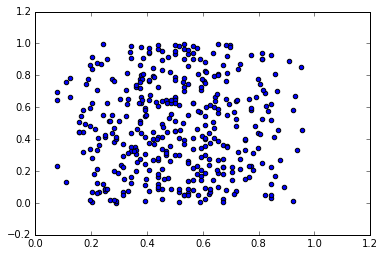

In [61]:
from scipy.stats import pearsonr


X_train, y_train = get_data('data/en/EI-reg-En-anger-train.txt')
X_test, y_test = get_data('data/en/2018-EI-reg-En-anger-dev.txt')

y_rand = np.array([np.random.uniform() for _ in range(y_test.shape[0])])

print('\tPearson R:', pearsonr(y_test, y_rand))

import matplotlib.pyplot as plt
plt.scatter(y_test, y_rand)
plt.show()